In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
url=filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

data=pd.read_csv(url)
data

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


In [3]:
df=pd.DataFrame(data)
df=df.drop(df.columns[0],axis=1)
df=df.drop(df.columns[0],axis=1)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


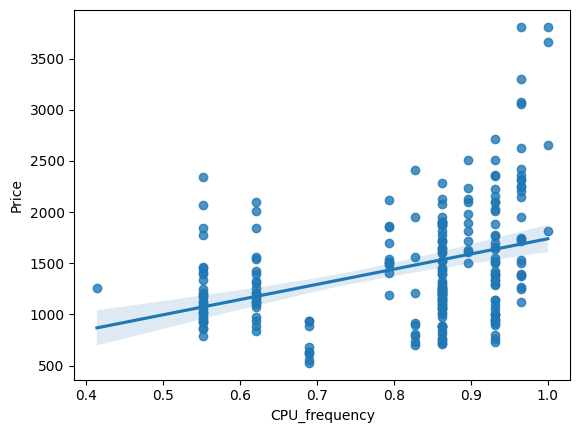

In [4]:
sns.regplot(y="Price",x="CPU_frequency",data=df)
df[["CPU_frequency","Price"]].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


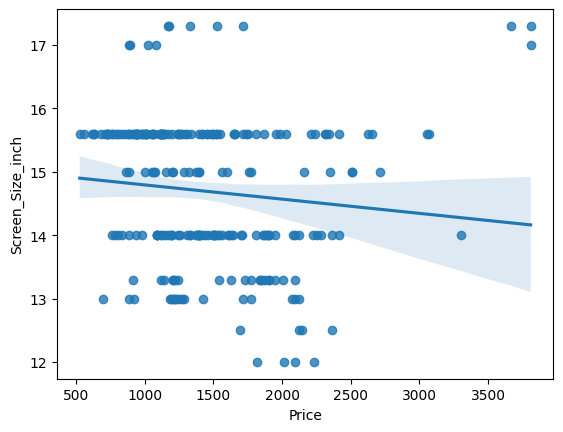

In [5]:
sns.regplot(y="Screen_Size_inch",x="Price",data=df)
df[["Screen_Size_inch","Price"]].corr()

,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


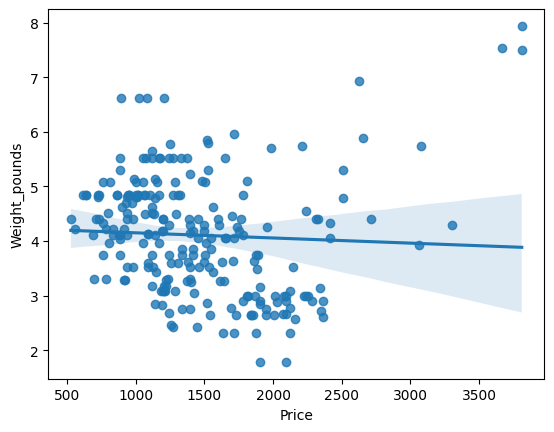

In [6]:
sns.regplot(y="Weight_pounds",x="Price",data=df)
df[["Weight_pounds","Price"]].corr()

In [7]:
list=df[["CPU_frequency","Screen_Size_inch","Weight_pounds"]]
for param in list:
   print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())


Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


<Axes: xlabel='Category', ylabel='Price'>

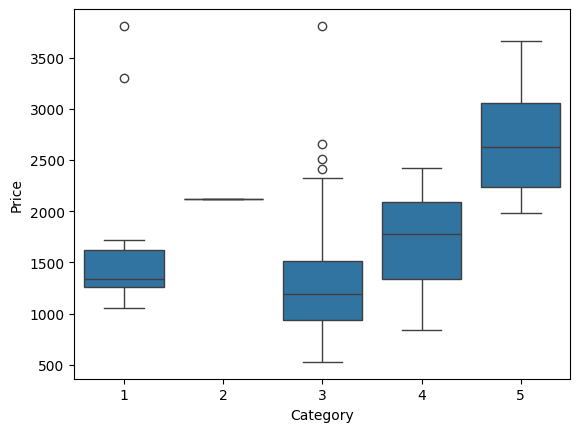

In [8]:
sns.boxplot(x="Category",y="Price",data=df)

<Axes: xlabel='GPU', ylabel='Price'>

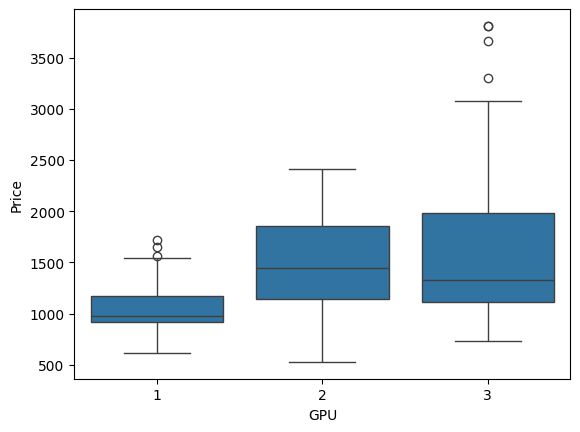

In [9]:
sns.boxplot(x="GPU",y="Price",data=df)

<Axes: xlabel='OS', ylabel='Price'>

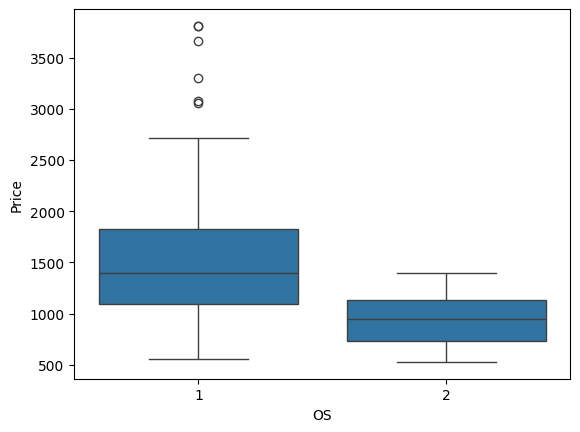

In [10]:
sns.boxplot(x="OS",y="Price",data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

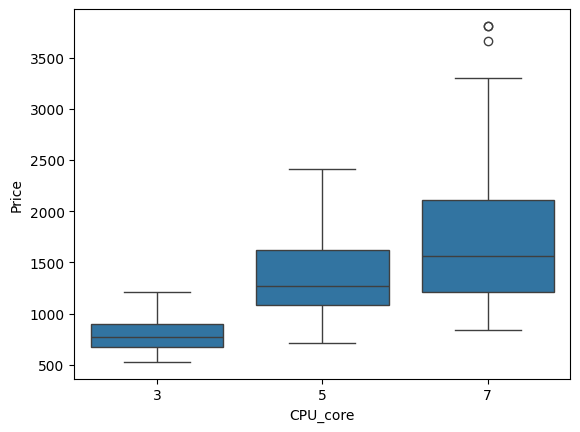

In [11]:
sns.boxplot(x="CPU_core",y="Price",data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

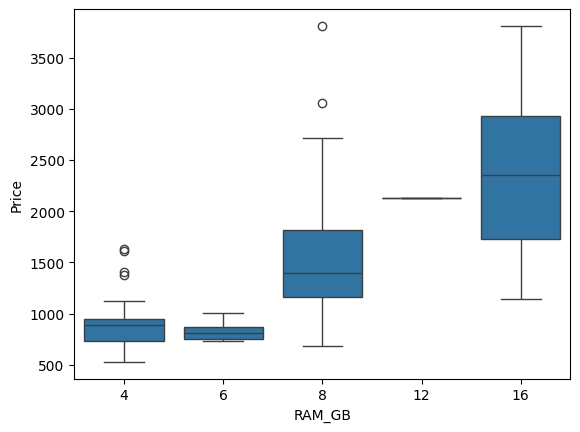

In [12]:
sns.boxplot(x="RAM_GB",y="Price",data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

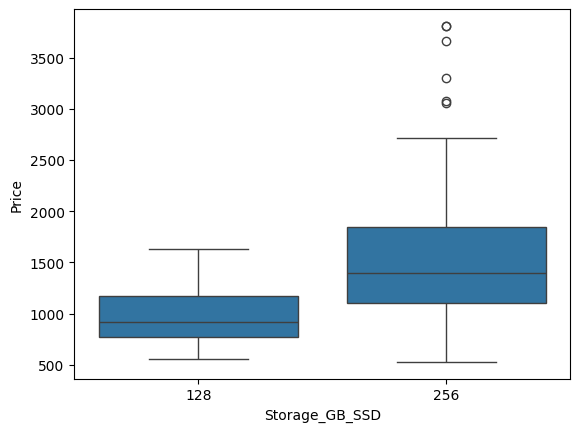

In [13]:
sns.boxplot(x="Storage_GB_SSD",y="Price",data=df)

In [14]:
df.describe(include=object)

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


In [15]:
# Como agrupo 2 colunas e df_g tem 3 o "mean()" fica referênciado ao "Price", não sendo necessário usar agg({"price" : "mean"})

df_g=df[['GPU','CPU_core','Price']]
df_group=df_g.groupby(["GPU","CPU_core"],as_index=False).mean()
df_group

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [16]:
dfpivot=df_group.pivot(index="GPU",columns="CPU_core")
dfpivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

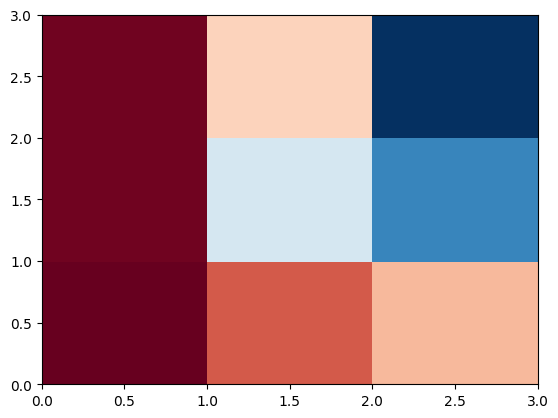

In [17]:
plt.pcolor(dfpivot, cmap='RdBu')
row_labels = dfpivot.columns.levels[1]
col_labels = dfpivot.index

In [18]:
pers_coef,p_value=sp.stats.pearsonr(df["GPU"],df["Price"])

In [19]:
i=['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']
for param in i:
    pers_coef,p_value=sp.stats.pearsonr(df[param],df["Price"])
    print(param,": pearson value",pers_coef,", P_value",p_value)

RAM_GB : pearson value 0.5492972971857841 , P_value 3.681560628842973e-20
CPU_frequency : pearson value 0.36666555892588615 , P_value 5.502463350713219e-09
Storage_GB_SSD : pearson value 0.24342075521810302 , P_value 0.00014898923191723976
Screen_Size_inch : pearson value -0.11064420817118273 , P_value 0.0885339784683062
Weight_pounds : pearson value -0.05031225837751551 , P_value 0.43976938534338894
CPU_core : pearson value 0.4593977773355115 , P_value 7.912950127009359e-14
OS : pearson value -0.22172980114827384 , P_value 0.000569664255924674
GPU : pearson value 0.28829819888814273 , P_value 6.166949698364437e-06
Category : pearson value 0.2862427558126413 , P_value 7.225696235806605e-06
